In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
private = read_csv("http://cssbook.net/d/private_capital.csv")
private = private %>% pivot_longer(cols = -Year, names_to="country", values_to="capital")
head(private)

Parsed with column specification:
cols(
  Year = col_double(),
  U.S. = col_double(),
  Japan = col_double(),
  Germany = col_double(),
  France = col_double(),
  U.K. = col_double(),
  Italy = col_double(),
  Canada = col_double(),
  Australia = col_double(),
  Spain = col_double()
)



Year,country,capital
<dbl>,<chr>,<dbl>
1970,U.S.,3.42
1970,Japan,2.99
1970,Germany,2.25
1970,France,3.10
1970,U.K.,3.06
1970,Italy,2.39


Parsed with column specification:
cols(
  Year = col_double(),
  U.S. = col_double(),
  Japan = col_double(),
  Germany = col_double(),
  France = col_double(),
  U.K. = col_double(),
  Italy = col_double(),
  Canada = col_double(),
  Australia = col_double(),
  Spain = col_double()
)



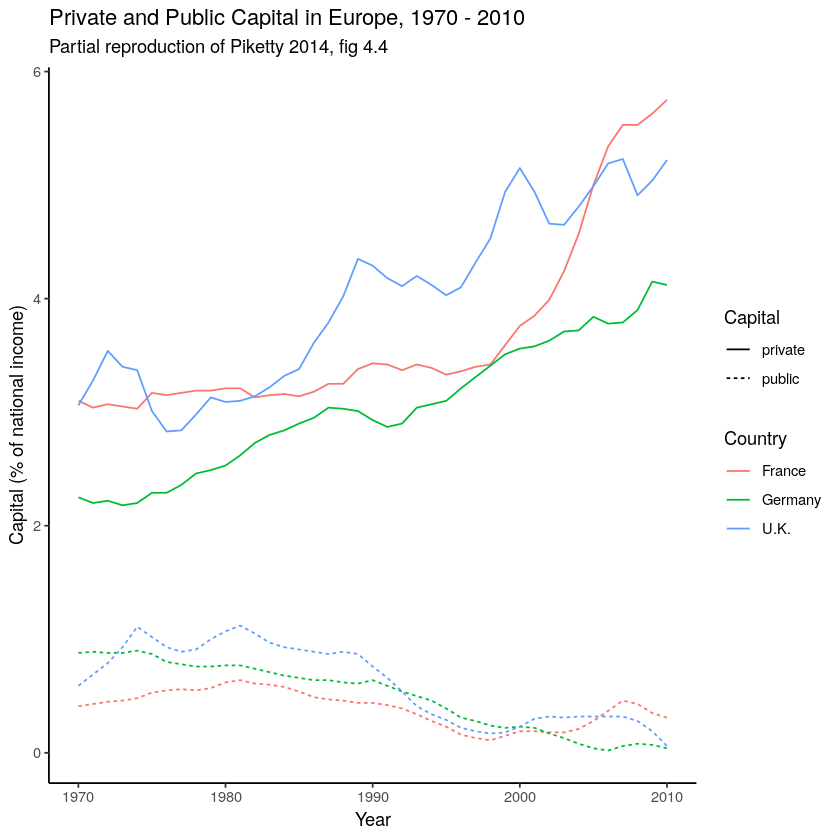

In [5]:
public = read_csv("http://cssbook.net/d/public_capital.csv") %>% 
  pivot_longer(cols = -Year, names_to="country", values_to="capital")

merged = bind_rows(private %>% add_column(type="private"),
                   public %>% add_column(type="public"))
merged %>% filter(country %in% c("Germany", "France", "U.K.")) %>% 
  ggplot(aes(x=Year, y=capital, color=country, lty=type)) + 
  geom_line()+ 
  ylab("Capital (% of national income)") +
  guides(colour=guide_legend("Country"), linetype=guide_legend("Capital")) + 
  theme_classic() + 
  ggtitle("Private and Public Capital in Europe, 1970 - 2010", 
          subtitle = "Partial reproduction of Piketty 2014, fig 4.4")
  

In [10]:
library(readxl)
#1 Input: Read the data into a data frame
dest = tempfile(fileext=".xls")
download.file("http://cssbook.net/d/Chapitre8TableauxGraphiques.xls", dest)
d = readxl::read_excel(dest, sheet="TS8.2", skip = 4)
d = d%>% rename("year"=1)

#2 Reshape: Pivoting the data into long format, dropping missing values
d = d %>% pivot_longer(cols=-year, values_to="share") %>% na.omit()

#3 Normalize
d = d %>% separate(name, into=c(NA, "percentile", "type", NA, "capital_gains"), 
                         sep=" ", extra="merge", fill="right") %>% 
  mutate(year=as.numeric(year), capital_gains=!is.na(capital_gains))

head(d)


New names:
* `` -> ...1



year,percentile,type,capital_gains,share
<dbl>,<chr>,<chr>,<lgl>,<dbl>
1900,10%,income,FALSE,0.40500000
1900,10%,income,TRUE,0.40280054
1910,10%,income,FALSE,0.40578506
1910,10%-5%,income,FALSE,0.09886691
1910,5%-1%,income,FALSE,0.12921815
1910,1%,income,FALSE,0.17770000


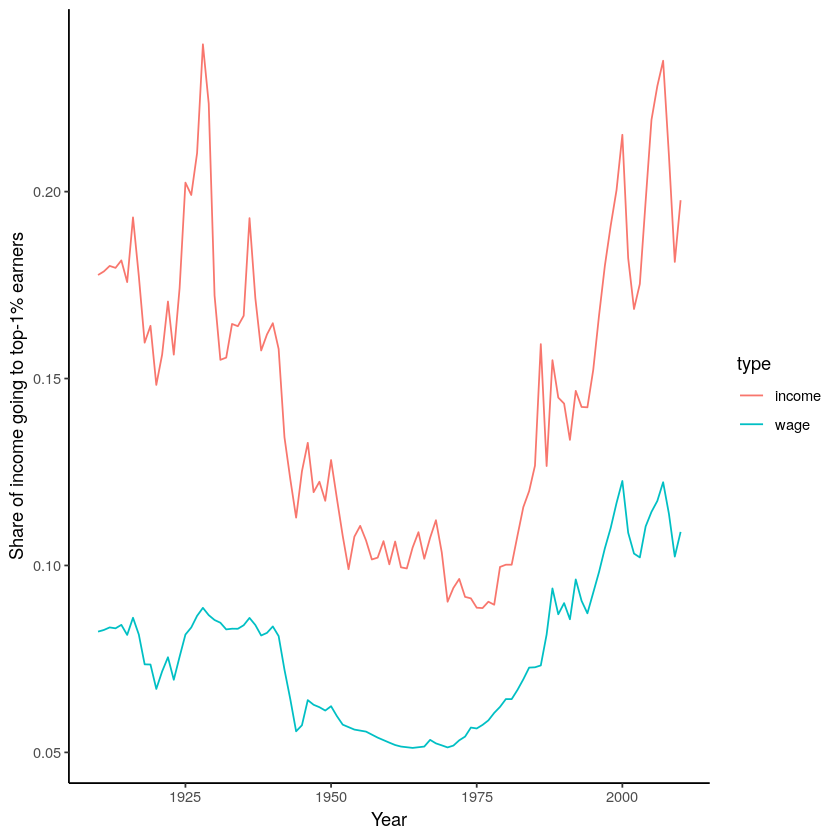

In [11]:
#4 Filter for the desired data
subset = d %>% filter(year >=1910, percentile=="1%", capital_gains==F)

#5 Analyze and/or visualization
ggplot(subset, aes(x=year, y=share, color=type)) + 
  geom_line() +
  xlab("Year") + ylab("Share of income going to top-1% earners") +
  theme_classic()
